In [1]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Read datasets
data  = pd.read_csv("fuel_ferc1.csv")

In [3]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# EDA

In [4]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [6]:
data.shape

(29523, 11)

In [7]:
# unique count check
feats = [f for f in data.columns if f not in ['record_id']]
for i in feats:
    print ('==' + str(i) + '==')
    print ('data:' + str(data[i].nunique()/data.shape[0]))


==utility_id_ferc1==
data:0.006266300850184602
==report_year==
data:0.0008467974121871084
==plant_name_ferc1==
data:0.07841344036852624
==fuel_type_code_pudl==
data:0.000203231378924906
==fuel_unit==
data:0.000304847068387359
==fuel_qty_burned==
data:0.895301967957186
==fuel_mmbtu_per_unit==
data:0.3802797818649866
==fuel_cost_per_unit_burned==
data:0.6576567422009958
==fuel_cost_per_unit_delivered==
data:0.5648138739288012
==fuel_cost_per_mmbtu==
data:0.42695525522474004


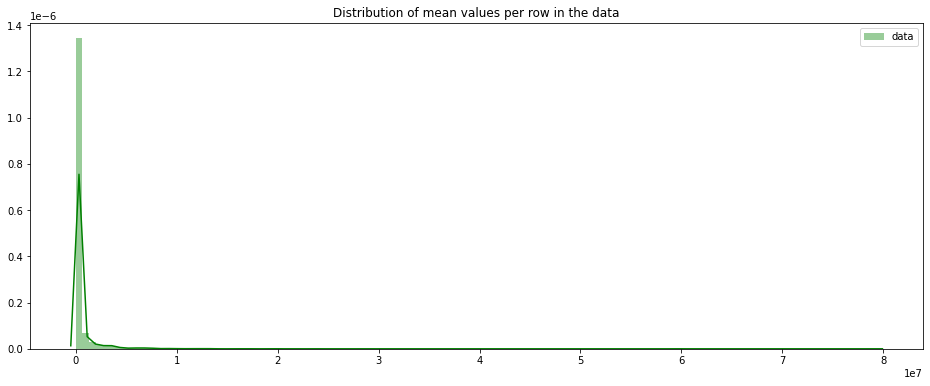

In [8]:
# Distribution of mean and std

plt.figure(figsize=(16,6))
features = data[feats].columns.values
plt.title("Distribution of mean values per row in the data")
sns.distplot(data[features].mean(axis=1),color="green", kde=True,bins=120, label='data')
plt.legend()
plt.show()

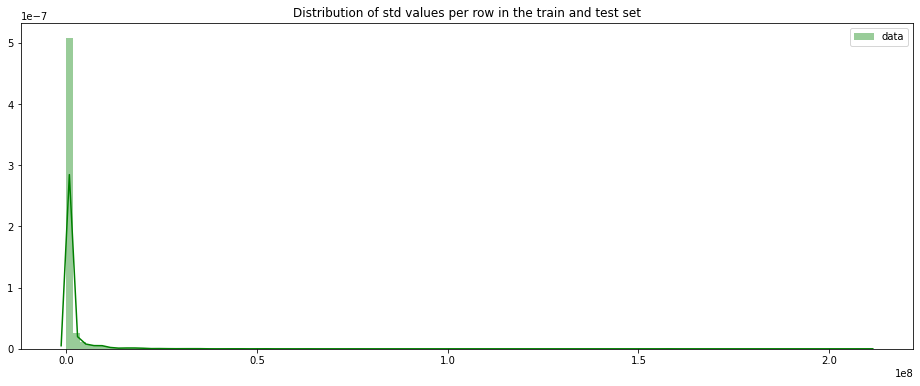

In [9]:
plt.figure(figsize=(16,6))
features = data[feats].columns.values
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(data[features].std(axis=1),color="green", kde=True,bins=120, label='data')
plt.legend()
plt.show()

In [10]:
# Feature Correlation

correlations = data[features].corr().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations

,level_0,level_1,0
0,fuel_mmbtu_per_unit,report_year,-0.110853
1,report_year,fuel_mmbtu_per_unit,-0.110853
2,fuel_mmbtu_per_unit,fuel_qty_burned,-0.080946
3,fuel_qty_burned,fuel_mmbtu_per_unit,-0.080946
4,fuel_mmbtu_per_unit,utility_id_ferc1,-0.066946
5,utility_id_ferc1,fuel_mmbtu_per_unit,-0.066946
6,fuel_qty_burned,utility_id_ferc1,-0.057447
7,utility_id_ferc1,fuel_qty_burned,-0.057447
8,utility_id_ferc1,fuel_cost_per_unit_burned,-0.037863
9,fuel_cost_per_unit_burned,utility_id_ferc1,-0.037863


In [11]:
data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


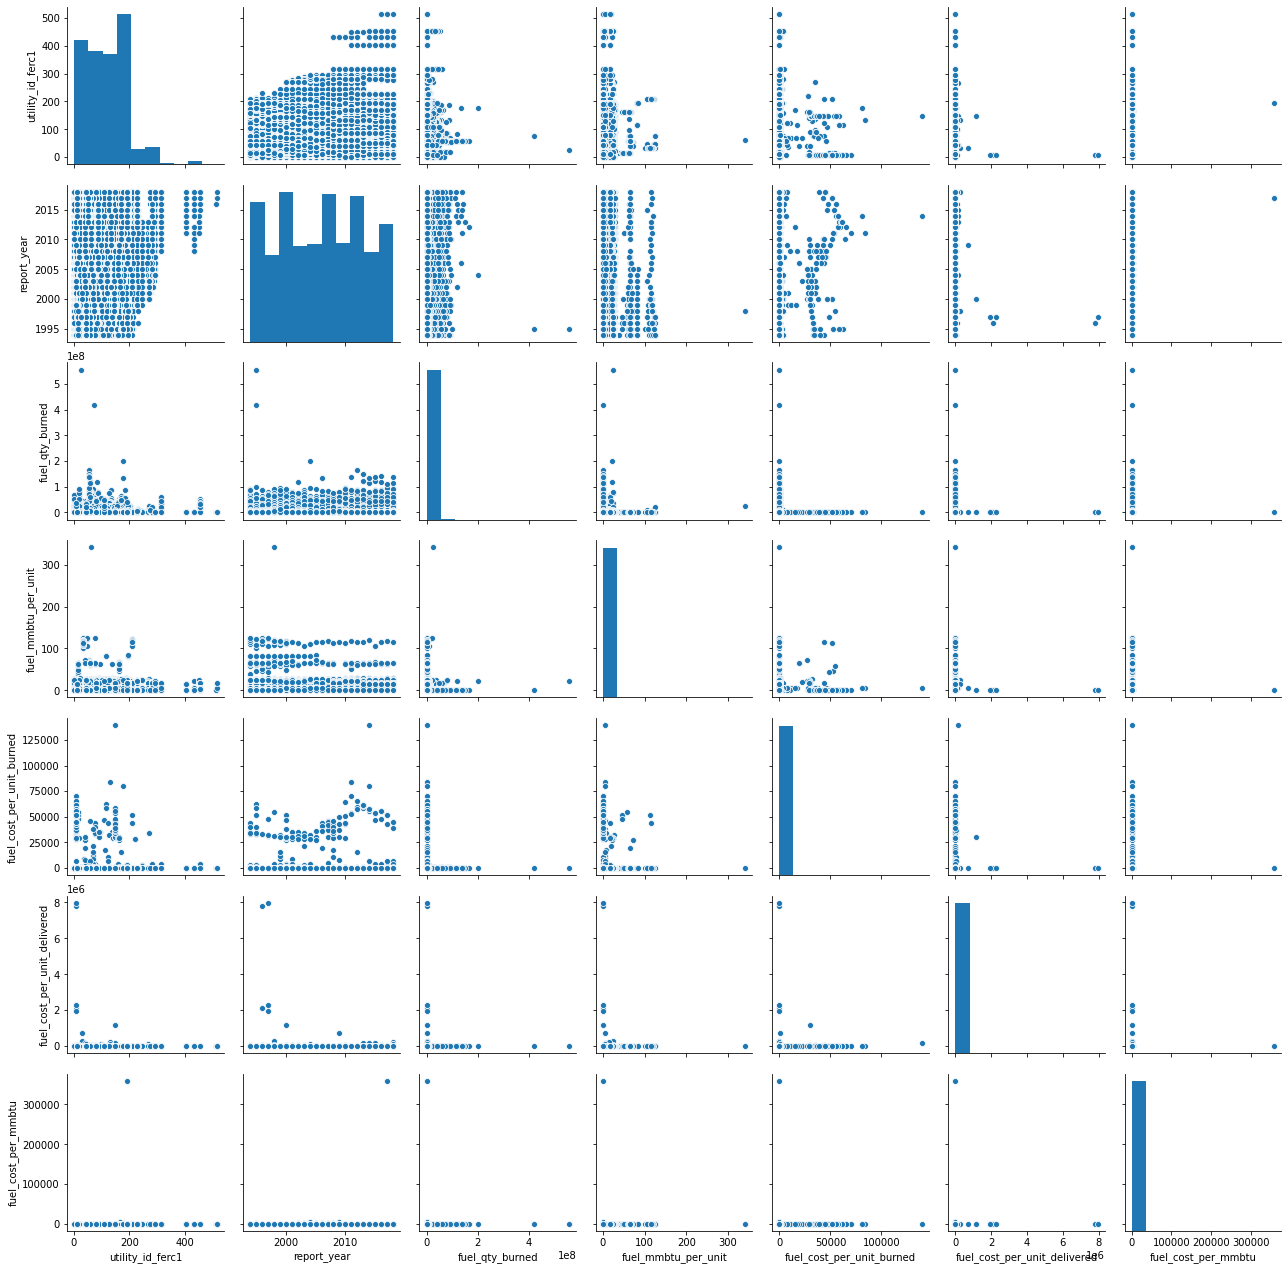

In [12]:
sns.pairplot(data)

In [13]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [14]:
data.columns


Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [15]:
code  = data.groupby("fuel_type_code_pudl")


## Question 3
Which of the following fuel type code has the lowest average fuel cost per unit burned?



In [16]:
code.mean()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937



## Question 4
What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?


In [17]:
data.fuel_mmbtu_per_unit.std()

10.600220307806714

In [18]:
data.fuel_mmbtu_per_unit.quantile(0.75) # 75th percentile


17.006

## Question 5
What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [19]:
data.fuel_qty_burned.skew()

15.851495469109503

In [20]:
data.fuel_qty_burned.kurtosis()

651.3694501337732


## Question 6
Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)


In [21]:
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [22]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [23]:
missing_value_df

,column_name,percent_missing
record_id,record_id,0.000000
utility_id_ferc1,utility_id_ferc1,0.000000
report_year,report_year,0.000000
plant_name_ferc1,plant_name_ferc1,0.000000
fuel_type_code_pudl,fuel_type_code_pudl,0.000000
fuel_unit,fuel_unit,0.609694
fuel_qty_burned,fuel_qty_burned,0.000000
fuel_mmbtu_per_unit,fuel_mmbtu_per_unit,0.000000
fuel_cost_per_unit_burned,fuel_cost_per_unit_burned,0.000000
fuel_cost_per_unit_delivered,fuel_cost_per_unit_delivered,0.000000


## Question 7
The feature with missing values falls under what category? What missing value imputation technique would you use?

In [24]:
data.fuel_unit.dtypes

dtype('O')

In [25]:
data.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

## Question 8
Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

In [26]:
correlations.sort_values(by = 0)

,level_0,level_1,0
0,fuel_mmbtu_per_unit,report_year,-0.110853
1,report_year,fuel_mmbtu_per_unit,-0.110853
2,fuel_mmbtu_per_unit,fuel_qty_burned,-0.080946
3,fuel_qty_burned,fuel_mmbtu_per_unit,-0.080946
4,fuel_mmbtu_per_unit,utility_id_ferc1,-0.066946
5,utility_id_ferc1,fuel_mmbtu_per_unit,-0.066946
6,fuel_qty_burned,utility_id_ferc1,-0.057447
7,utility_id_ferc1,fuel_qty_burned,-0.057447
8,utility_id_ferc1,fuel_cost_per_unit_burned,-0.037863
9,fuel_cost_per_unit_burned,utility_id_ferc1,-0.037863


In [27]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570



## Question 9
For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [28]:
((data[(data.report_year ==1998)&(data.fuel_type_code_pudl == "coal")].fuel_cost_per_unit_burned.sum() -data[(data.report_year ==1994)&(data.fuel_type_code_pudl == "coal")].fuel_cost_per_unit_burned.sum())/data[(data.report_year ==1994)&(data.fuel_type_code_pudl == "coal")].fuel_cost_per_unit_burned.sum())*100

-20.56765451826053

In [29]:
# or

In [30]:
coal  = data[data.fuel_type_code_pudl == "coal"]

In [31]:
a = coal[coal.report_year ==1998]
b  = coal[coal.report_year ==1994]

In [32]:
((a.fuel_cost_per_unit_burned.sum() - b.fuel_cost_per_unit_burned.sum())/(b.fuel_cost_per_unit_burned.sum()))*100

-20.56765451826053


## Question 10
Which year has the highest average fuel cost per unit delivered?


In [33]:
data.groupby("report_year").mean()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.120648,2.724018e+06,10.638098,213.191996,63.636060,3.086977
1995,110.139051,3.712067e+06,10.644830,354.422555,32.735269,2.868838
1996,108.714154,2.544754e+06,10.778041,79.434995,9196.705948,2.695880
1997,108.366545,2.813503e+06,10.247632,149.482132,11140.197239,3.113486
1998,109.845528,3.267453e+06,10.704964,126.683519,287.154420,2.775862
1999,108.222857,3.281281e+06,10.558885,120.053605,25.551627,2.740251
2000,111.083758,2.472032e+06,9.224475,237.797111,985.362877,4.208403
2001,113.521386,2.321402e+06,8.371469,133.013010,60.050396,4.612658
2002,120.354357,2.145645e+06,8.304833,101.179365,47.594361,6.226281
